# Data Collection

In [72]:
import os
import requests
import zipfile
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [73]:
!gdown --id "1wGD2leYR24xpxYbihVfyjFSo9Ir_iFJu"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wGD2leYR24xpxYbihVfyjFSo9Ir_iFJu
To: /content/Medicalpremium.csv
100% 30.8k/30.8k [00:00<00:00, 55.8MB/s]


In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [75]:
df = pd.read_csv("/content/Medicalpremium.csv")
df.head(10)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
5,30,0,0,0,0,160,69,1,0,1,23000
6,33,0,0,0,0,150,54,0,0,0,21000
7,23,0,0,0,0,181,79,1,0,0,15000
8,48,1,0,0,0,169,74,1,0,0,23000
9,38,0,0,0,0,182,93,0,0,0,23000


# Data Understanding & Removing Outlier


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [77]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [78]:
len(df)

986

In [53]:
df.shape

(986, 11)

In [54]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


# Handling Missing Value


In [55]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [56]:
df.isnull().any()

,0
Age,False
Diabetes,False
BloodPressureProblems,False
AnyTransplants,False
AnyChronicDiseases,False
Height,False
Weight,False
KnownAllergies,False
HistoryOfCancerInFamily,False
NumberOfMajorSurgeries,False


In [79]:
df.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [80]:
df.isna().any()

,0
Age,False
Diabetes,False
BloodPressureProblems,False
AnyTransplants,False
AnyChronicDiseases,False
Height,False
Weight,False
KnownAllergies,False
HistoryOfCancerInFamily,False
NumberOfMajorSurgeries,False


# Handling Outliers


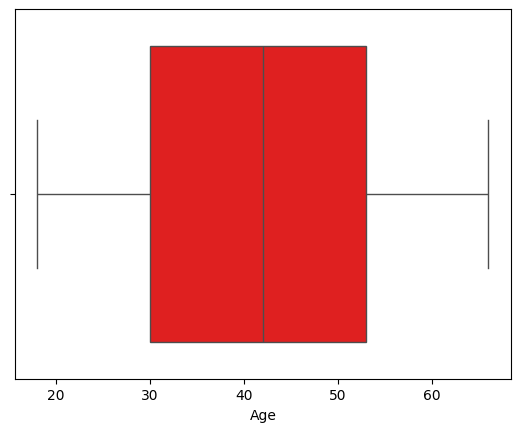

In [81]:
sns.boxplot(x=df['Age'], color='red')
plt.show()

<Axes: xlabel='Height'>

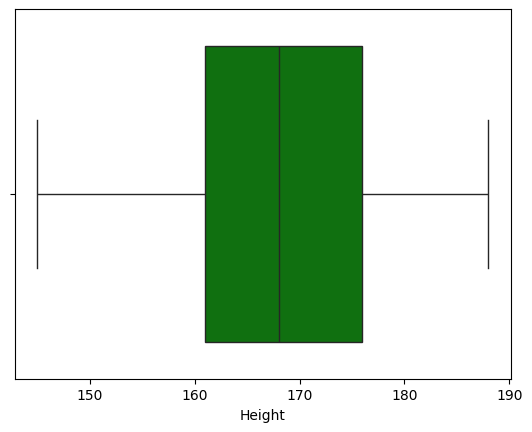

In [82]:
sns.boxplot(x=df['Height'], color='green')

<Axes: xlabel='Weight'>

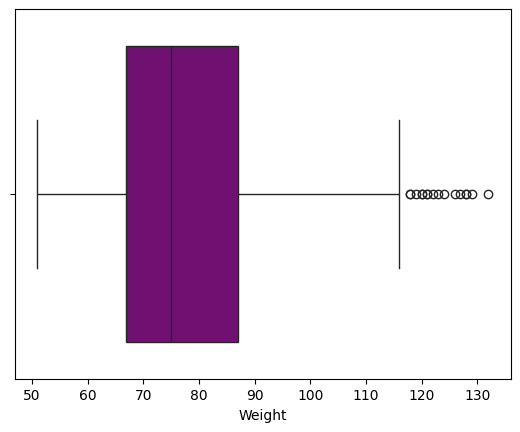

In [83]:
sns.boxplot(x=df['Weight'], color='purple')

<Axes: xlabel='NumberOfMajorSurgeries'>

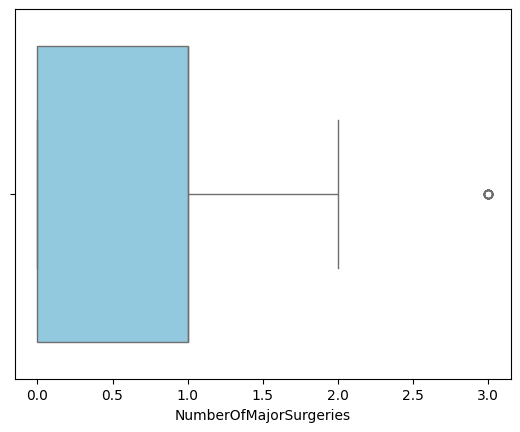

In [86]:
sns.boxplot(x=df['NumberOfMajorSurgeries'], color='skyblue')

In [87]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
insurance=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
insurance.shape

(518, 11)

# Univariate Analysis


In [89]:
cat_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']
num_features = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

**Categorical Features**

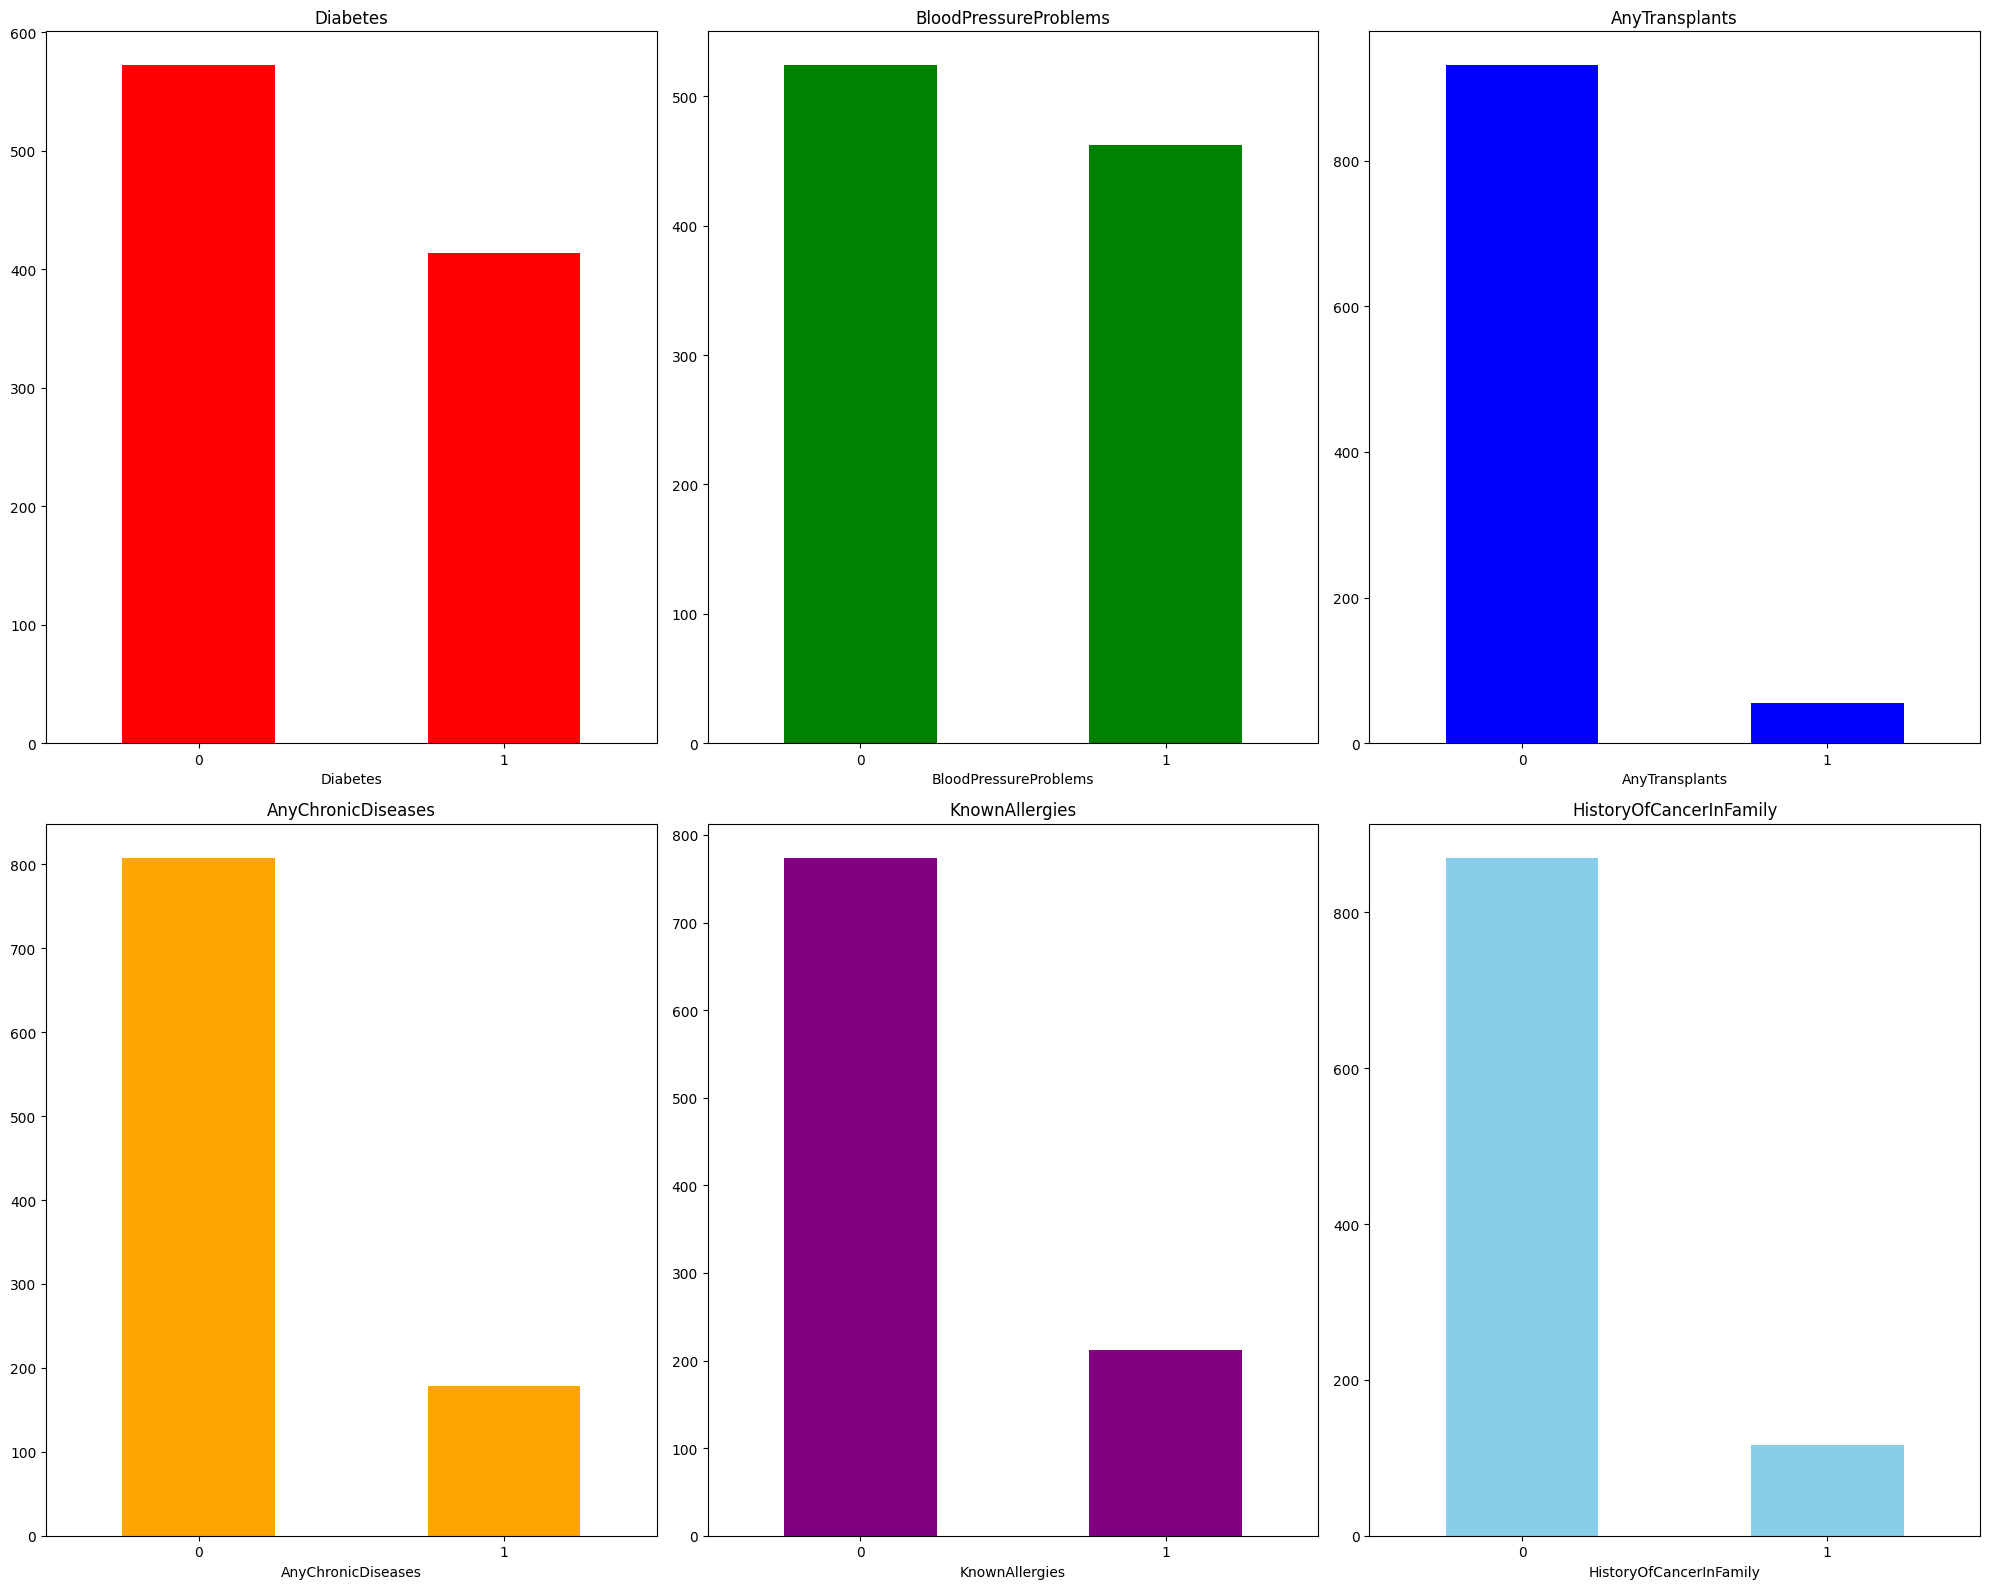

In [90]:
import matplotlib.pyplot as plt
plt.subplots(2, 3, figsize=(20, 16))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'skyblue']
for i, col in enumerate(cat_features):
  plt.subplot(2, 3, i + 1)
  df.groupby(col).size().plot(kind='bar', rot=0, color=colors[i])
  plt.title(col)
plt.tight_layout()
plt.show()


          jumlah sampel  persentase
Diabetes                           
0                   572      58.000
1                   414      42.000


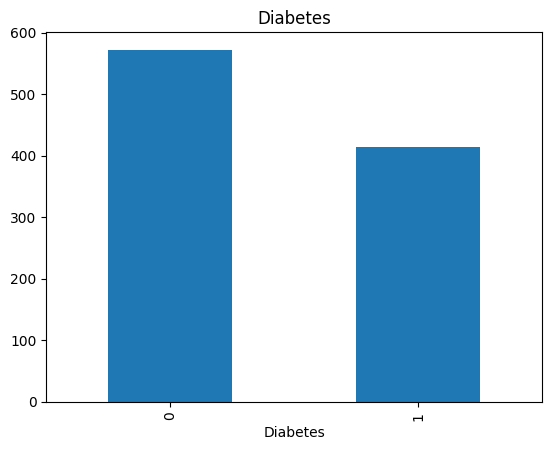

In [95]:
feature = cat_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df0 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df0)
count.plot(kind='bar', title=feature);

                       jumlah sampel  persentase
BloodPressureProblems                           
0                                524      53.100
1                                462      46.900


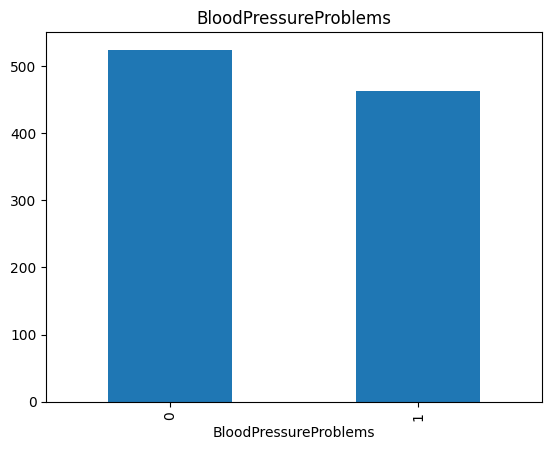

In [96]:
feature = cat_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
AnyTransplants                           
0                         931      94.400
1                          55       5.600


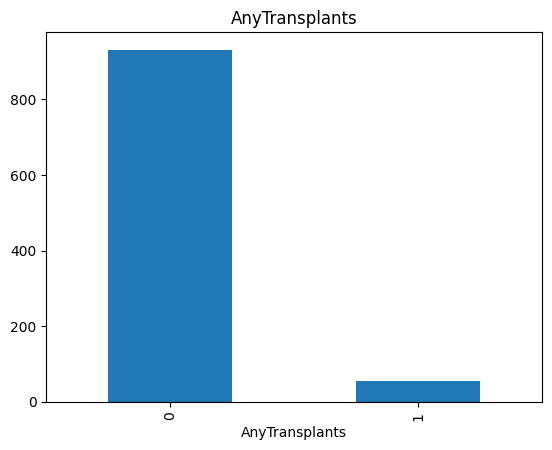

In [97]:
feature = cat_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

                    jumlah sampel  persentase
AnyChronicDiseases                           
0                             808      81.900
1                             178      18.100


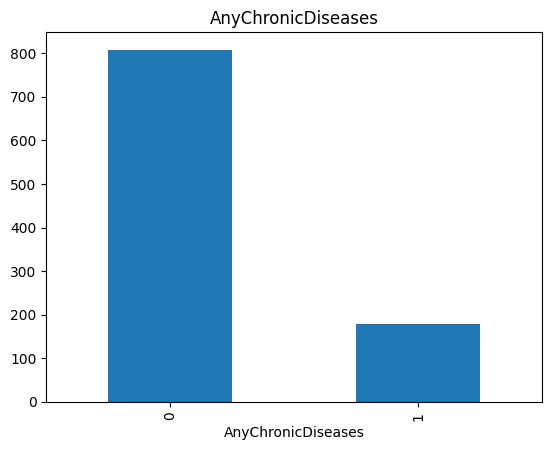

In [98]:
feature = cat_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df3 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df3)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
KnownAllergies                           
0                         774      78.500
1                         212      21.500


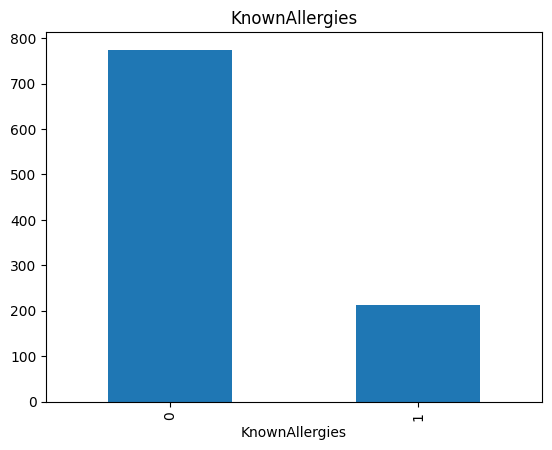

In [99]:
feature = cat_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df4 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df4)
count.plot(kind='bar', title=feature);

                         jumlah sampel  persentase
HistoryOfCancerInFamily                           
0                                  870        88.2
1                                  116        11.8


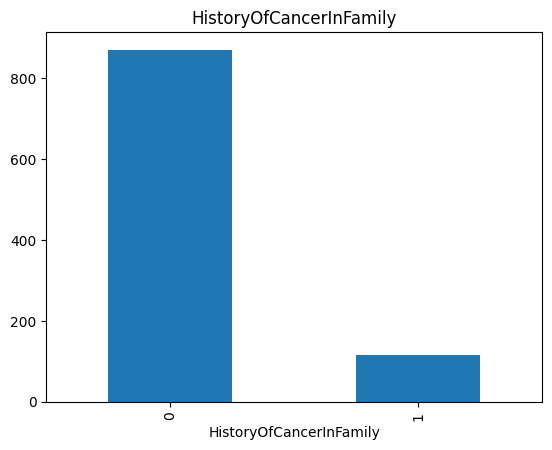

In [69]:
feature = cat_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df5 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df5)
count.plot(kind='bar', title=feature);

**Numerical Features**

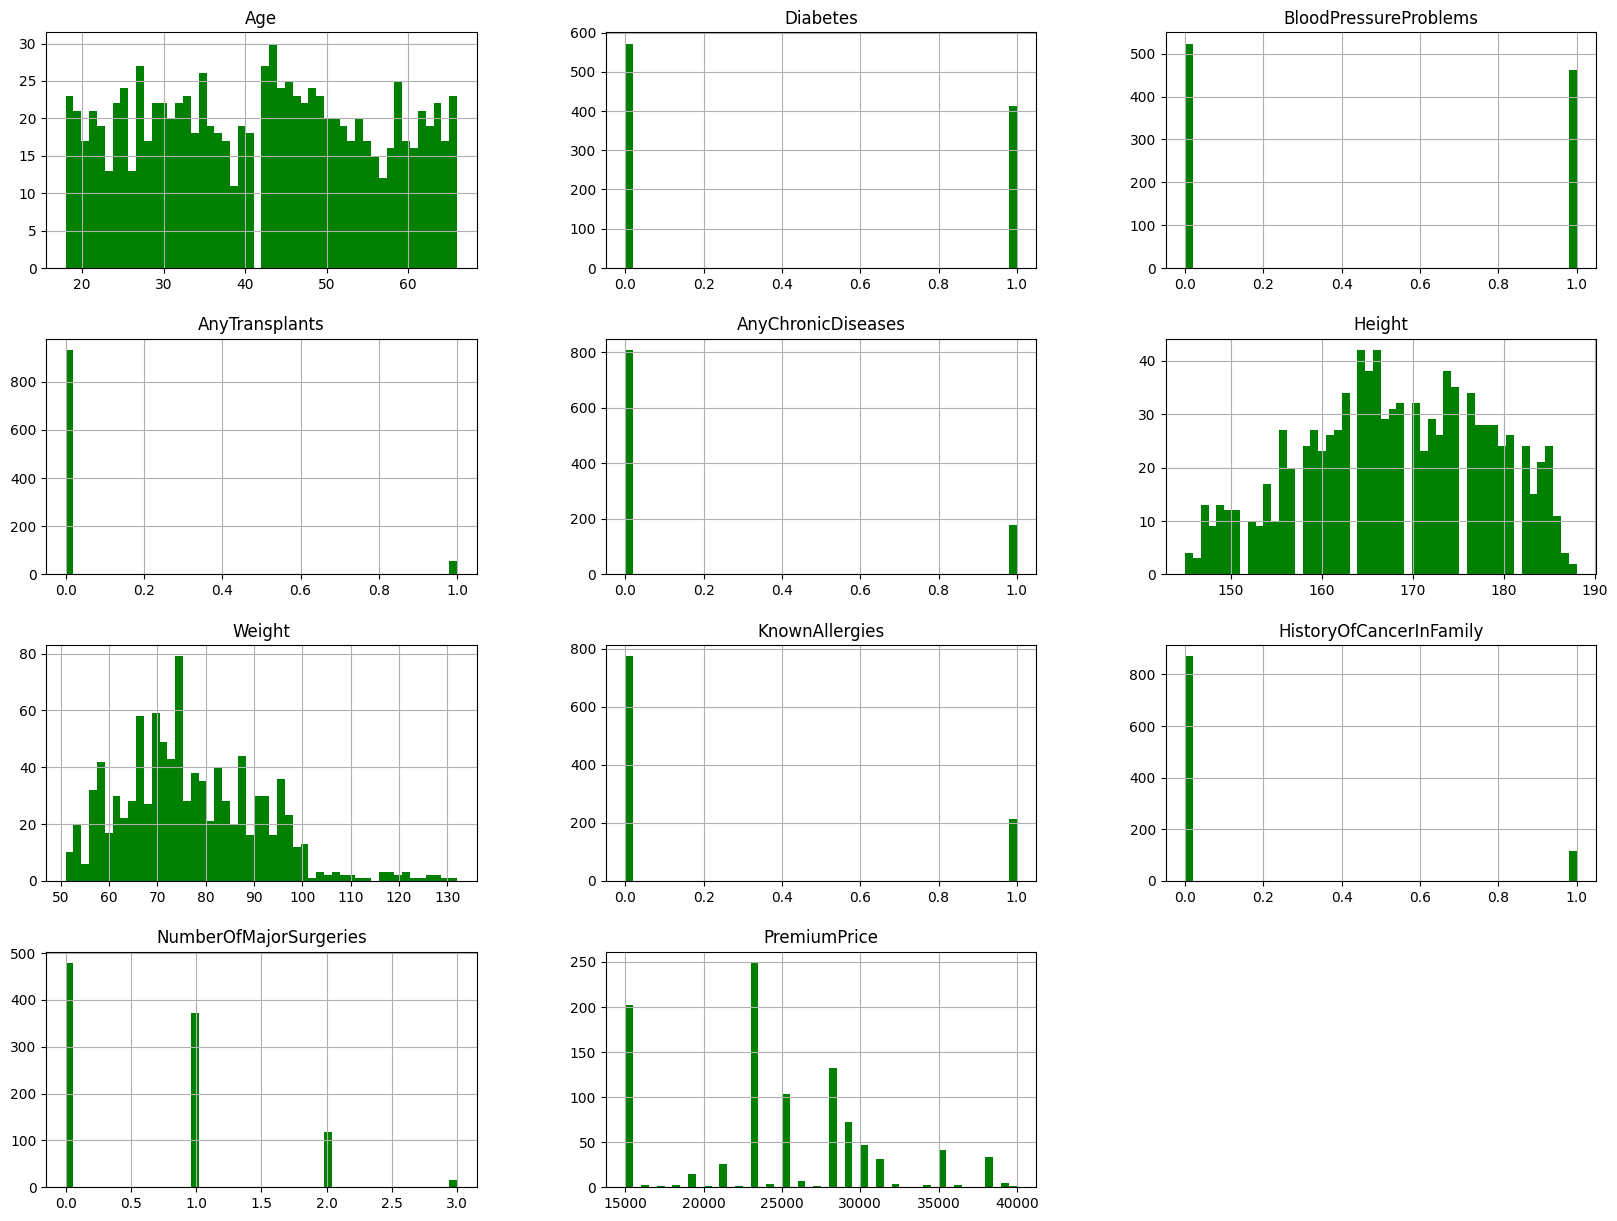

In [103]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15), color='green')
plt.show()

# Multivariate Analysis


**Categorical Features**

In [104]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="PremiumPrice", kind="bar", color='red', dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'PremiumPrice' Relatif terhadap - {}".format(col))

**Numerical Features**

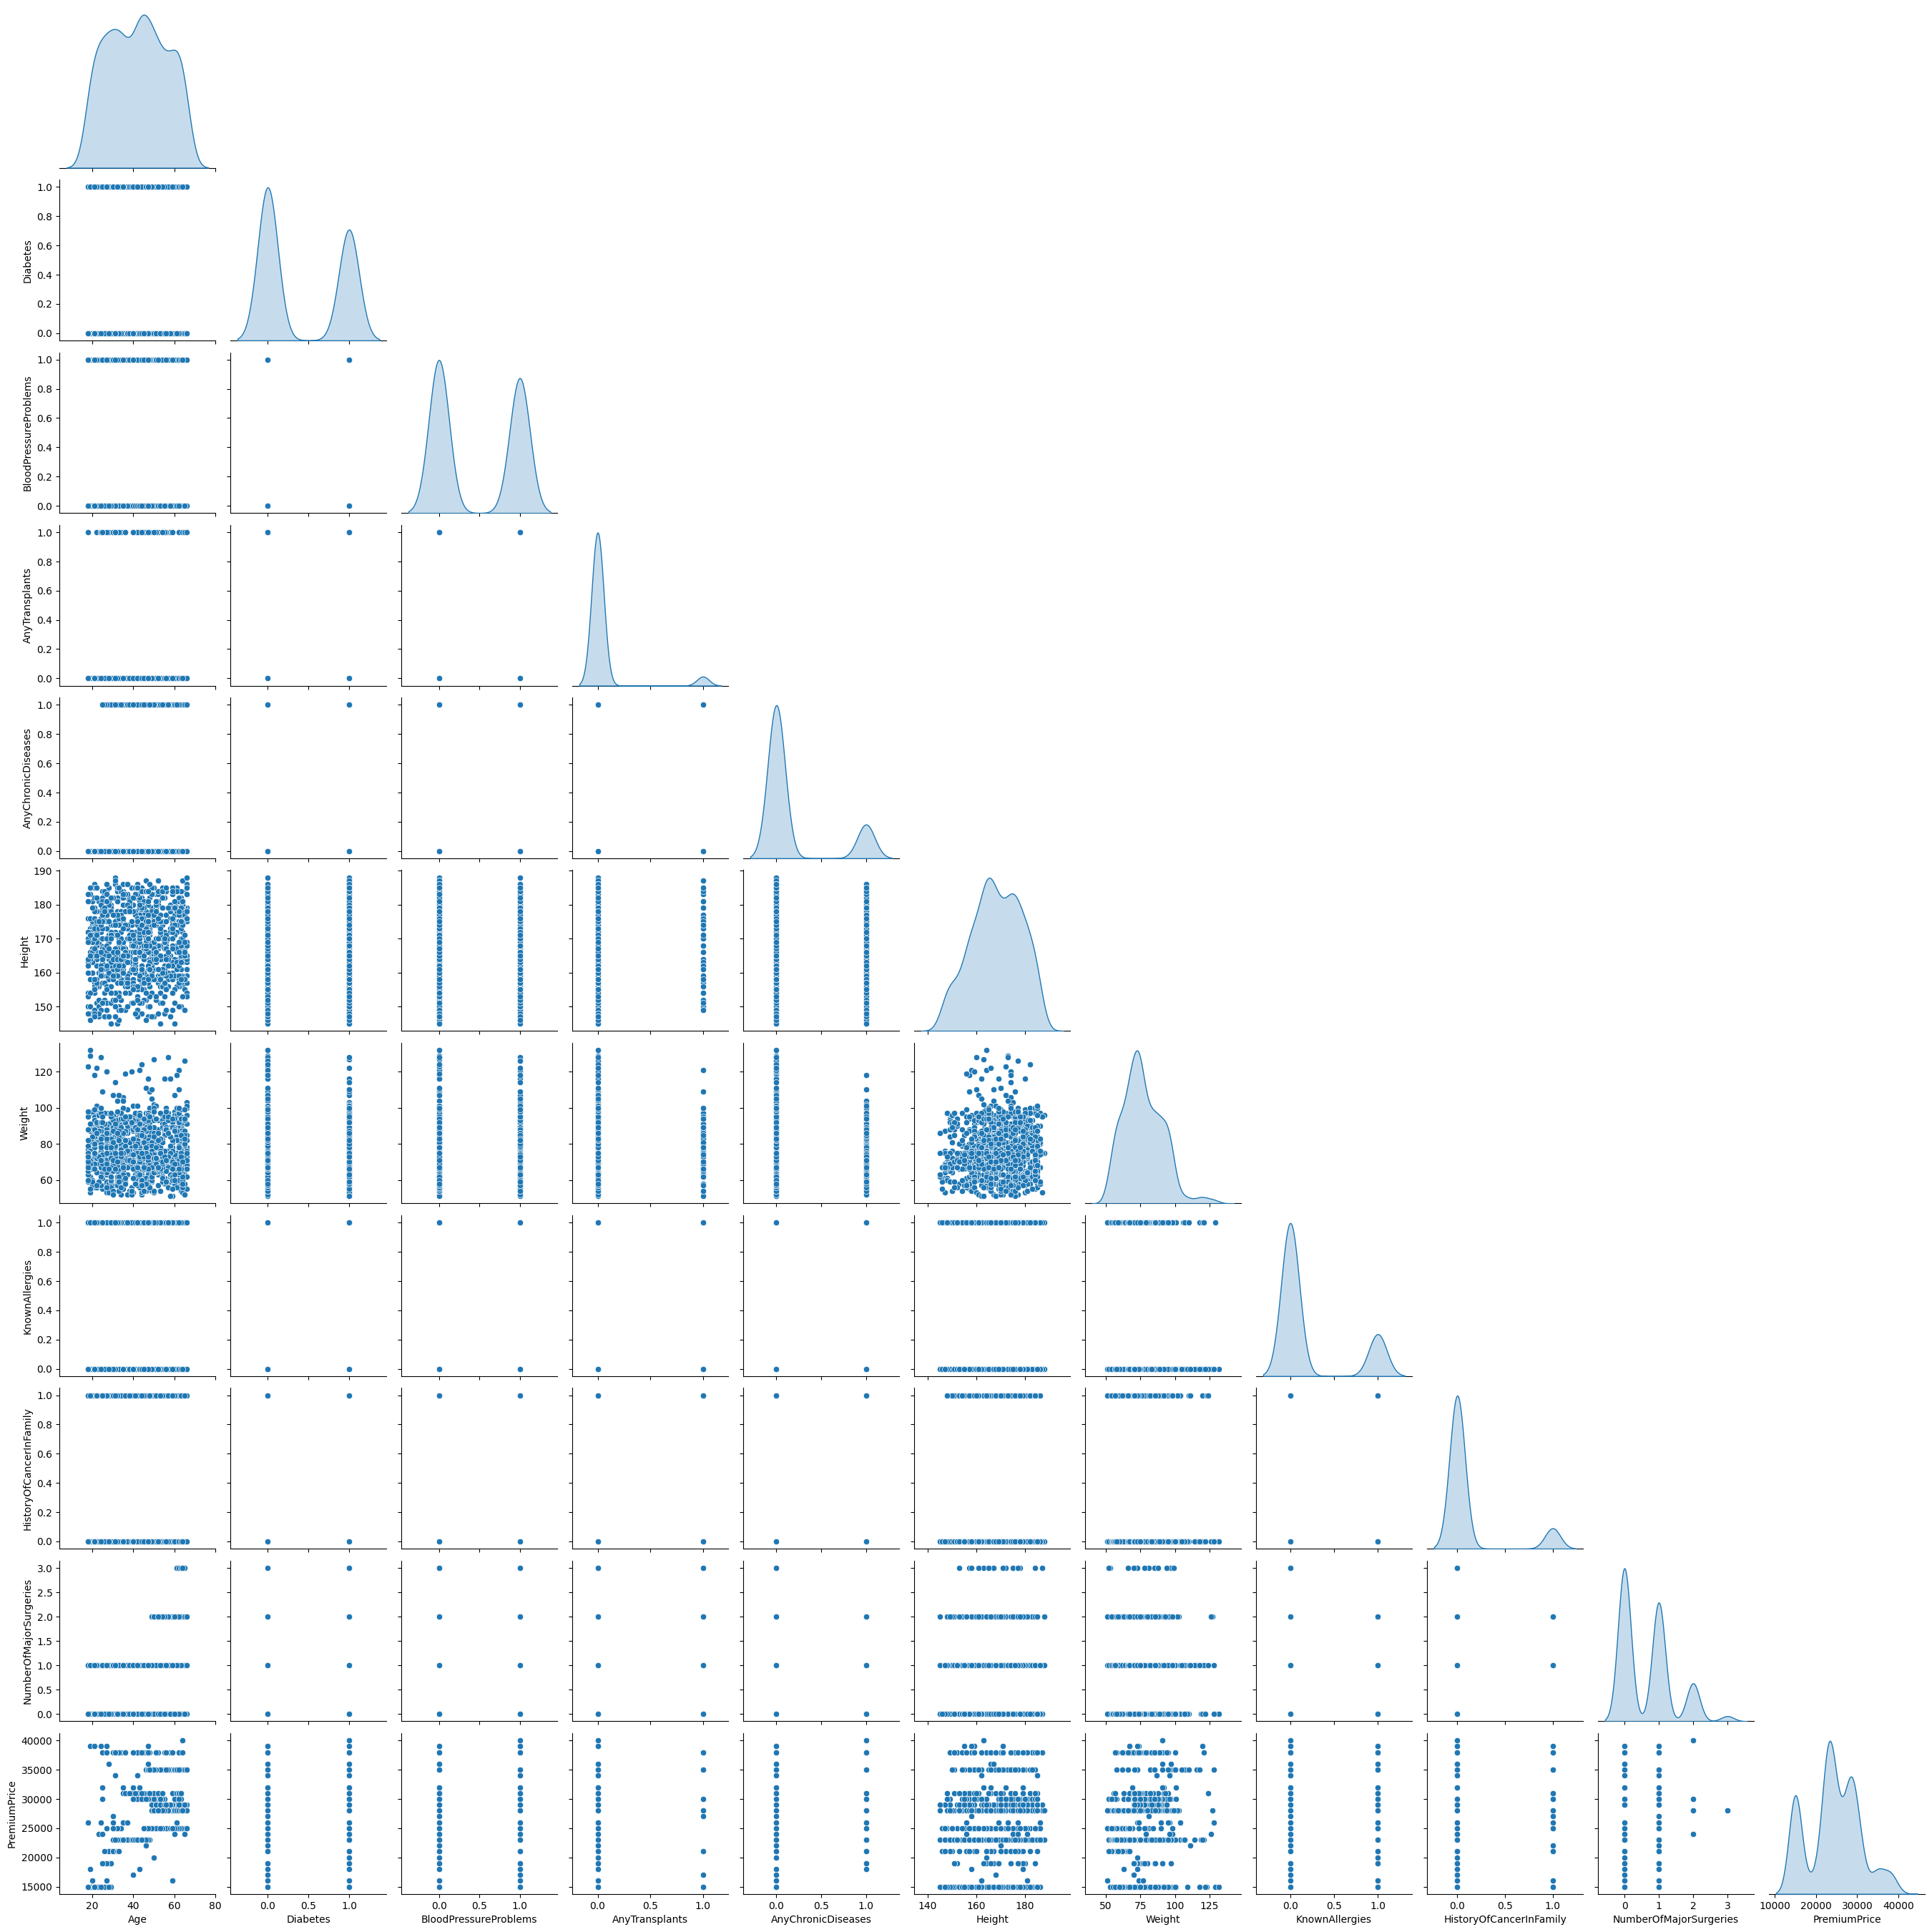

In [110]:
sns.pairplot(df, diag_kind = 'kde', corner = True)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

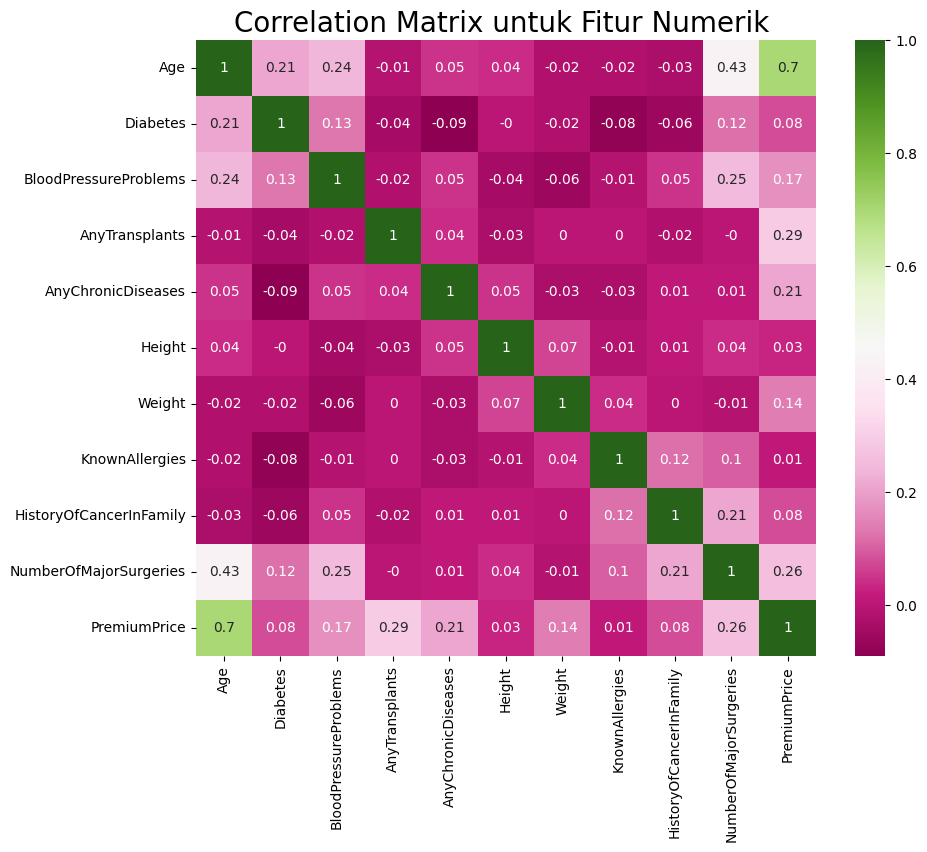

In [111]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='PiYG' )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

In [106]:
#One Hot Encoding
data_cat =  pd.get_dummies(df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']])

In [107]:
data_cat

,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,1,1,0,0,0,0
3,1,1,0,1,0,0
4,0,0,0,1,0,0
5,0,0,0,0,1,0
6,0,0,0,0,0,0
7,0,0,0,0,1,0
8,1,0,0,0,1,0
9,0,0,0,0,0,0


In [29]:
# Concenate Dataframe
df = pd.concat([df,data_cat],axis=1)

In [30]:
df.drop(columns=['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'],inplace=True)

In [31]:
# Split Dataset
from sklearn.model_selection import train_test_split

X = df.drop(['PremiumPrice'],axis =1)
y = df['PremiumPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [32]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 986
Total # of sample in train dataset: 788
Total # of sample in test dataset: 198


In [33]:
print(f'Total # of sample in whole dataset: {len(y)}')
print(f'Total # of sample in train dataset: {len(y_train)}')
print(f'Total # of sample in test dataset: {len(y_test)}')

Total # of sample in whole dataset: 986
Total # of sample in train dataset: 788
Total # of sample in test dataset: 198


# Model Development

In [34]:
# Dataframe untuk menyimpan hasil
result = pd.DataFrame(index=['train_mse', 'test_mse','eval_train','eval_test'],
                      columns=['Huber', 'SVR'])

In [35]:
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [36]:
# Train Model Huber
hr = HuberRegressor()
hr.fit(X_train, y_train)

result.loc['train_mse','Huber'] = mean_squared_error(y_pred = hr.predict(X_train), y_true=y_train)

In [37]:
# Train Model SVR
svr = SVR()
svr.fit(X_train, y_train)

result.loc['train_mse','SVR'] = mean_squared_error(y_pred = svr.predict(X_train), y_true=y_train)

In [38]:
# Prediksi data testing dan simpan hasil ke dataframe
result.loc['test_mse','Huber'] = mean_squared_error(y_pred = hr.predict(X_test), y_true=y_test)
result.loc['test_mse','SVR'] = mean_squared_error(y_pred = svr.predict(X_test), y_true=y_test)

In [39]:
result

,Huber,SVR
train_mse,18480694.567724,40114366.684487
test_mse,25177990.874554,42742505.675315
eval_train,NaN,NaN
eval_test,NaN,NaN


# Model Evaluation

<Axes: >

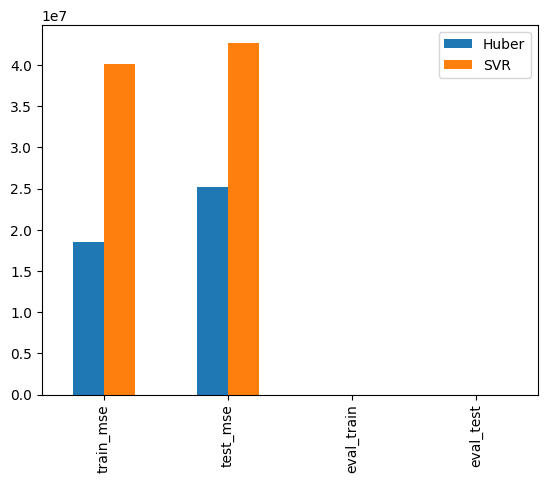

In [40]:
result.plot(kind='bar')

In [41]:
from sklearn.model_selection import GridSearchCV

# Hyperparams Menggunakan Grid Search pada Huber
hr_eval = HuberRegressor()
param_grid = { #Setup Params
    'epsilon': [1.0, 1.5, 2.0],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300]
}

grid_search_huber = GridSearchCV(hr_eval, param_grid, scoring='neg_mean_squared_error', cv=5)

In [42]:
# Train Model dengan hyperparam
grid_search_huber.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_huber.best_params_)
print("Best Score:", grid_search_huber.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best hyperparameters: {'alpha': 0.01, 'epsilon': 2.0, 'max_iter': 100}
Best Score: -18344039.247511588


In [43]:
# Data Testing
result.loc['eval_train','Huber'] = mean_squared_error(y_pred = grid_search_huber.predict(X_train), y_true=y_train)
result.loc['eval_test','Huber'] = mean_squared_error(y_pred = grid_search_huber.predict(X_test), y_true=y_test)

In [44]:
# Hyperparams Menggunakan Grid Search pada SVR
svr_eval = SVR()
param_grid_svr = { #Setup Params
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.3]
}
# Train models menggunakan hyperparams
grid_search_svr = GridSearchCV(svr_eval, param_grid_svr, scoring='neg_mean_squared_error', cv=5)
grid_search_svr.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_svr.best_params_)
print("Best Score:", grid_search_svr.best_score_)

Best hyperparameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Best Score: -18763048.7300375


In [45]:
# Data Testing
result.loc['eval_train','SVR'] = mean_squared_error(y_pred = grid_search_svr.predict(X_train), y_true=y_train)
result.loc['eval_test','SVR'] = mean_squared_error(y_pred = grid_search_svr.predict(X_test), y_true=y_test)

In [46]:
result

,Huber,SVR
train_mse,18480694.567724,40114366.684487
test_mse,25177990.874554,42742505.675315
eval_train,18104561.093408,18614533.696279
eval_test,24212812.872048,25605704.542962


<Axes: >

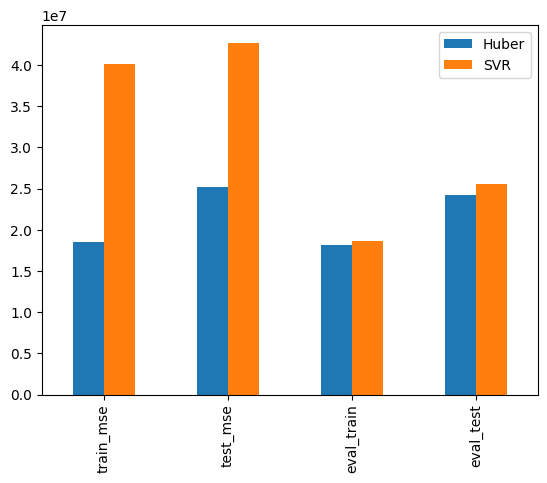

In [47]:
result.plot(kind='bar')

In [112]:
# get requirement.txt

!pip freeze > requirements.txt